# First partial exam

#### Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Loading data

In [2]:
pima = pd.read_csv("ds-home-5min-avg.csv")

In [3]:
pima.head()

,date,pre,hum,tem,occ
0,28/05/2020 09:30,94822.75,61.94,29.97,L
1,28/05/2020 02:25,94442.35,54.76,31.07,L
2,04/06/2020 10:00,94712.64,61.19,30.09,E
3,04/06/2020 05:45,94564.56,59.78,30.46,L
4,04/06/2020 09:35,94725.16,61.41,30.00,L


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 5 columns):
date    1005 non-null object
pre     1005 non-null float64
hum     1005 non-null float64
tem     1005 non-null float64
occ     1005 non-null object
dtypes: float64(3), object(2)
memory usage: 39.3+ KB


### Plots for statistical distribution

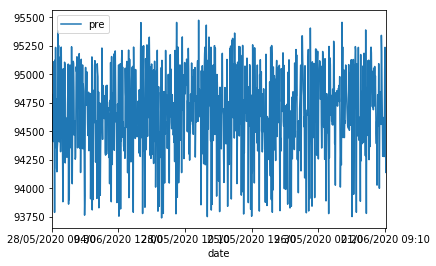

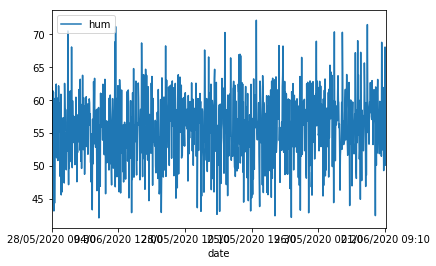

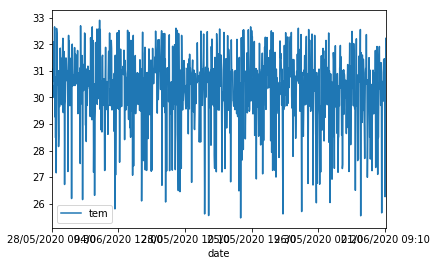

In [5]:
pima.plot(x='date', y='pre')
pima.plot(x='date', y='hum')
pima.plot(x='date', y='tem')

### Correlation Matrix

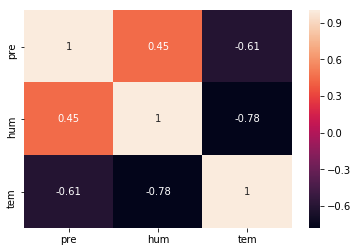

In [6]:
pima = pd.DataFrame(pima, columns=['pre','hum','tem'])
corrMatrix = pima.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Feature Selection

In [7]:
feature_cols = ['pre', 'hum', 'tem']
X = pima[feature_cols]
y = pima.hum

#### Splitting Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

#### Biolding the Decision Tree Model

In [9]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.astype('int'), y_train.astype('int')) # TODO: Not sure if int is good type
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred.astype('int')))

Accuracy: 0.4735099337748344


#### Visualizing Decision Trees

In [11]:
pip install graphviz

You should consider upgrading via the '/home/adrian/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pydotplus

You should consider upgrading via the '/home/adrian/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
# TODO: Decision tree is not displayed
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols, 
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

IndexError: list index out of range

#### Optimizing Decision Tree Performance

In [14]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train.astype('int'), y_train.astype('int'))
y_pred = clf.predict(X_test)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred.astype('int')))

Accuracy: 0.3708609271523179


### Neural nets

In [18]:
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [19]:
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

TypeError: '(slice(None, None, None), 0)' is an invalid key

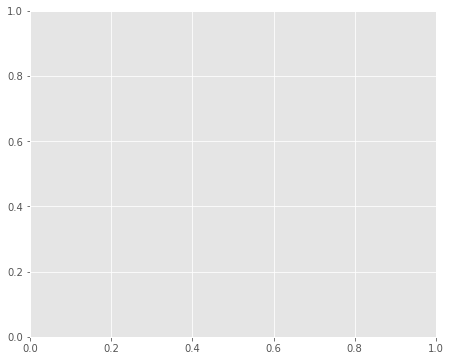

In [23]:
# TODO: No funciona bien
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(feature_cols):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(feature_cols):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_59 (Dense)             (None, 31)                279       
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_62 (Dense)             (None, 31)                279       
Total params: 383
Trainable params: 383
Non-

In [30]:
from keras.callbacks import TensorBoard

history_dict = {}

cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 1.638318419456482
Test accuracy: 0.5109344124794006
Model name: model_2
Test loss: 1.2971779108047485
Test accuracy: 0.6878727674484253
Model name: model_3
Test loss: 0.9764093160629272
Test accuracy: 0.7733598351478577


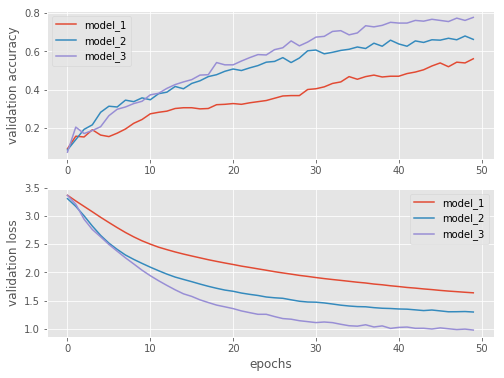

In [31]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()